In [1]:
import pandas as pd 
import numpy as np
from pyspark.sql import SparkSession
from pyspark.sql import functions
from pyspark.sql.types import FloatType
from cassandra.cluster import Cluster
import matplotlib.pyplot as plt

In [2]:
# CONEXAO COM CASSANDRA
clstr = Cluster(['34.95.248.131'], port=9042)
session = clstr.connect('analise_combustivel')

In [3]:
dados = session.execute("select id, bandeira, cnpj, data_da_coleta, estado_sigla, municipio, produto, razao_social, regiao_sigla, valor_de_compra, valor_de_venda from consumo;")
df_consumo = pd.DataFrame(dados)
print("Total de valores no banco de dados: ", len(df_consumo))

Total de valores no banco de dados:  5558536


In [4]:
df_consumo['ano'] = pd.to_datetime(df_consumo['data_da_coleta'], format='%d/%m/%Y')
df_consumo['ano'] = df_consumo['ano'].dt.year

In [5]:
df = df_consumo.loc[df_consumo["ano"] == 2020]
df = df.loc[df["produto"] == "GASOLINA"]
df.drop(columns=['valor_de_venda', 'ano'], inplace = True)
df.dropna(inplace = True)
df_norte = df.loc[df["regiao_sigla"] == "N"]
df_sul = df.loc[df["regiao_sigla"] == "S"]
df_nordeste = df.loc[df["regiao_sigla"] == "NE"]
df_sudeste = df.loc[df["regiao_sigla"] == "SE"]
df_centrooeste = df.loc[df["regiao_sigla"] == "CO"]

In [6]:
df_norte = df_norte.groupby('bandeira').mean()
df_norte.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_norte.head(3)

,valor_de_compra
bandeira,
RAIZEN,4.141322
RZD DISTRIBUIDORA,3.924000
EQUADOR,3.919718


In [7]:
df_norte.tail(3)

,valor_de_compra
bandeira,
ATEM S,3.762075
BRANCA,3.668493
SP,3.362736


In [8]:
df_sul = df_sul.groupby('bandeira').mean()
df_sul.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_sul.head(3)

,valor_de_compra
bandeira,
CHARRUA,4.045191
ALESAT,3.925520
RODOIL,3.906909


In [9]:
df_sul.tail(3)

,valor_de_compra
bandeira,
UNI,3.266667
DIBRAPE,3.092000
REJAILE,3.037000


In [10]:
df_nordeste = df_nordeste.groupby('bandeira').mean()
df_nordeste.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_nordeste.head(3)

,valor_de_compra
bandeira,
FAN,4.120767
SP,4.067183
SABBÁ,4.005295


In [11]:
df_nordeste.tail(3)

,valor_de_compra
bandeira,
BRANCA,3.733004
PETROBAHIA,3.724866
LARCO,3.630122


In [12]:
df_sudeste = df_sudeste.groupby('bandeira').mean()
df_sudeste.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_sudeste.head(3)

,valor_de_compra
bandeira,
PETROBAHIA,4.382400
ROYAL FIC,4.093818
TOBRAS,4.091475


In [13]:
df_sudeste.tail(3)

,valor_de_compra
bandeira,
TORRAO,3.802981
BRANCA,3.689118
D`MAIS,2.972000


In [14]:
df_centrooeste = df_centrooeste.groupby('bandeira').mean()
df_centrooeste.sort_values(by=['valor_de_compra'], ascending=False, inplace=True)
df_centrooeste.head(3)

,valor_de_compra
bandeira,
ALESAT,4.304131
IDAZA,4.035987
SIMARELLI,4.025455


In [15]:
df_centrooeste.tail(3)

,valor_de_compra
bandeira,
RAIZEN,3.926975
BRANCA,3.809526
TOTAL BRASIL,3.764384


In [16]:
print("Quantidade de bandeiras por região do país")
print("Norte:", df_norte.count() )
print("Sul:", df_sul.count() )
print("Nordeste:", df_nordeste.count() )
print("Sudeste:", df_sudeste.count() )
print("Centro Oeste:", df_centrooeste.count() )

Quantidade de bandeiras por região do país
Norte: valor_de_compra    10
dtype: int64
Sul: valor_de_compra    19
dtype: int64
Nordeste: valor_de_compra    18
dtype: int64
Sudeste: valor_de_compra    16
dtype: int64
Centro Oeste: valor_de_compra    11
dtype: int64


Utilizando os dados válidos podemos observar que o maior custo dos postos é a compra do combustivel, é interessante realizar uma análise sobre quais os valores de compra das diferentes bandeiras existentes, para isso fizemos o calculo da média de cada bandeira por cada região do país. Com isso, é possível saber quanto cada bandeira cobra por litro de combustivel, podendo o posto trocar de bandeira, respeitando os termos do contrato, ou alterar para a bandeira branca (sem bandeira) e comprar o combustível de onde desejar.

In [17]:
df_aux = df_consumo.dropna()
gasolina = df_aux.loc[df_aux["produto"] == 'GASOLINA']
etanol = df_aux.loc[df_aux["produto"] == 'ETANOL']
diesel = df_aux.loc[df_aux["produto"] == 'DIESEL']
s10 = df_aux.loc[df_aux["produto"] == 'DIESEL S10'] 
gnv = df_aux.loc[df_aux["produto"] == 'GNV'] 

dataframe_gasolina = gasolina.groupby("ano").mean()
dataframe_gasolina.reset_index(inplace = True)
dataframe_etanol = etanol.groupby("ano").mean()
dataframe_etanol.reset_index(inplace = True)
dataframe_diesel = diesel.groupby("ano").mean()
dataframe_diesel.reset_index(inplace = True)
dataframe_diesels10 = s10.groupby("ano").mean()
dataframe_diesels10.reset_index(inplace = True)
dataframe_gnv = gnv.groupby("ano").mean()
dataframe_gnv.reset_index(inplace = True)

In [18]:
dataframe_gasolina.head(6)

,ano,valor_de_compra,valor_de_venda
0,2015,2.869361,3.342737
1,2016,3.215956,3.710795
2,2017,3.264299,3.760772
3,2018,3.946797,4.440201
4,2019,3.924824,4.407901
5,2020,3.810710,4.343647


In [19]:
dataframe_etanol.head(6)

,ano,valor_de_compra,valor_de_venda
0,2015,1.950074,2.343859
1,2016,2.404418,2.794140
2,2017,2.428783,2.836334
3,2018,2.664936,3.083471
4,2019,2.732595,3.134798
5,2020,2.753024,3.162003


In [20]:
dataframe_diesel.head(6)

,ano,valor_de_compra,valor_de_venda
0,2015,2.470903,2.801961
1,2016,2.662390,3.014832
2,2017,2.677042,3.095290
3,2018,3.117760,3.499266
4,2019,3.189854,3.591255
5,2020,2.988433,3.441578


In [21]:
dataframe_diesels10.head(6)

,ano,valor_de_compra,valor_de_venda
0,2015,2.607668,2.957039
1,2016,2.768530,3.146159
2,2017,2.778714,3.214802
3,2018,3.190279,3.590683
4,2019,3.261024,3.684071
5,2020,3.057918,3.546259


In [22]:
dataframe_gnv.head(6)

,ano,valor_de_compra,valor_de_venda
0,2015,1.497894,2.095897
1,2016,1.591202,2.293498
2,2017,1.673769,2.400115
3,2018,1.949797,2.804422
4,2019,2.386468,3.277294
5,2020,2.366267,3.292984


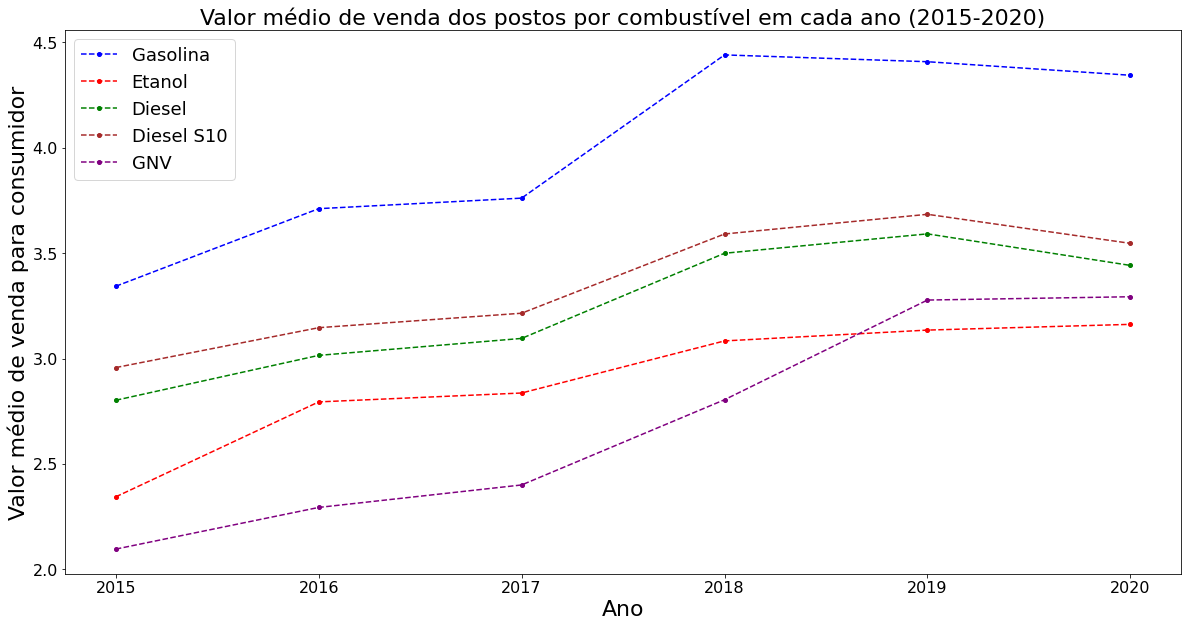

In [23]:
plt.figure(figsize=(20,10))
plt.plot(dataframe_gasolina["ano"], dataframe_gasolina["valor_de_venda"], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(dataframe_etanol["ano"], dataframe_etanol["valor_de_venda"], linestyle='--', marker='o', color = 'red', markersize = 4)
plt.plot(dataframe_diesel["ano"], dataframe_diesel["valor_de_venda"], linestyle='--', marker='o', color = 'green', markersize = 4)
plt.plot(dataframe_diesels10["ano"], dataframe_diesels10["valor_de_venda"], linestyle='--', marker='o', color = 'brown', markersize = 4)
plt.plot(dataframe_gnv["ano"], dataframe_gnv["valor_de_venda"], linestyle='--', marker='o', color = 'purple', markersize = 4)
plt.title("Valor médio de venda dos postos por combustível em cada ano (2015-2020)", fontsize=22)
plt.xlabel("Ano", fontsize=22)
plt.ylabel("Valor médio de venda para consumidor", fontsize=22)
plt.legend(['Gasolina','Etanol','Diesel','Diesel S10',"GNV"], fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.show()

Gráfico com a média histórica anual do valor de venda dos combustíveis para os consumidores.

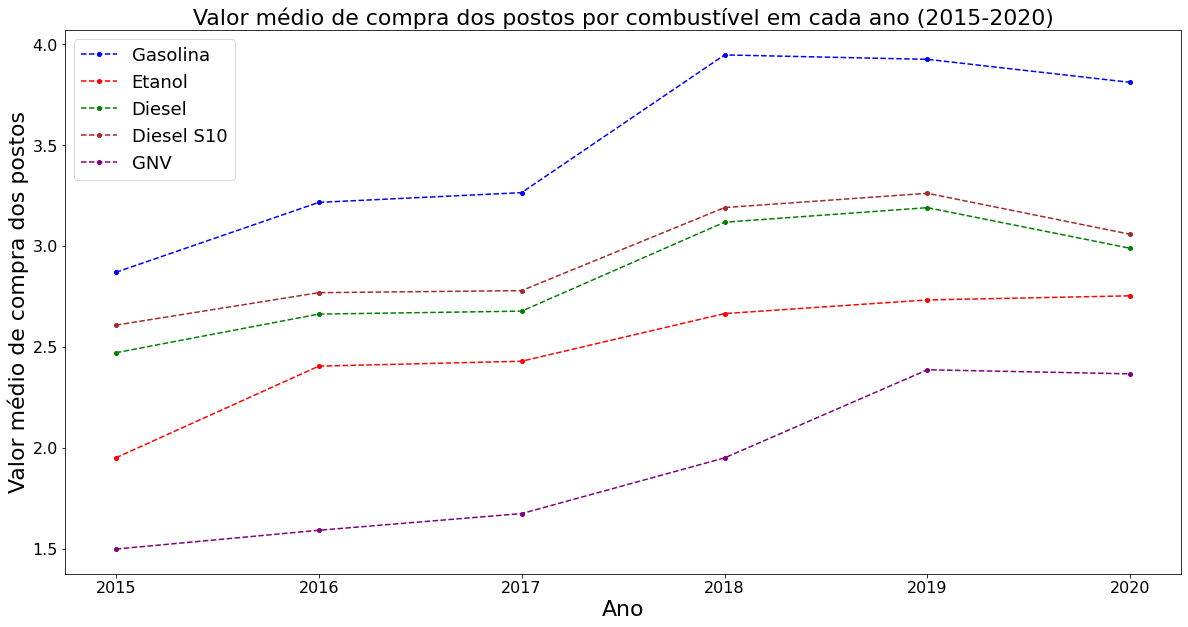

In [24]:
plt.figure(figsize=(20,10))
plt.plot(dataframe_gasolina["ano"], dataframe_gasolina["valor_de_compra"], linestyle='--', marker='o', color = 'blue', markersize = 4)
plt.plot(dataframe_etanol["ano"], dataframe_etanol["valor_de_compra"], linestyle='--', marker='o', color = 'red', markersize = 4)
plt.plot(dataframe_diesel["ano"], dataframe_diesel["valor_de_compra"], linestyle='--', marker='o', color = 'green', markersize = 4)
plt.plot(dataframe_diesels10["ano"], dataframe_diesels10["valor_de_compra"], linestyle='--', marker='o', color = 'brown', markersize = 4)
plt.plot(dataframe_gnv["ano"], dataframe_gnv["valor_de_compra"], linestyle='--', marker='o', color = 'purple', markersize = 4)
plt.title("Valor médio de compra dos postos por combustível em cada ano (2015-2020)", fontsize=22)
plt.xlabel("Ano", fontsize=22)
plt.ylabel("Valor médio de compra dos postos", fontsize=22)
plt.legend(['Gasolina','Etanol','Diesel','Diesel S10',"GNV"], fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.show()

Gráfico com a média histórica anual do valor de compra dos combustíveis pelos postos.

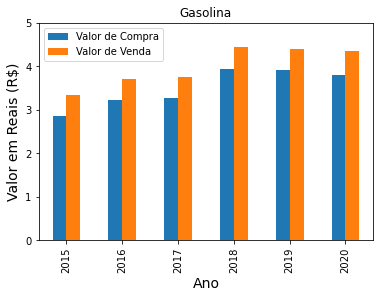

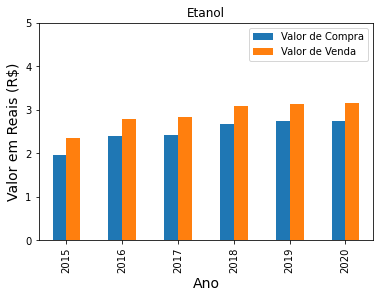

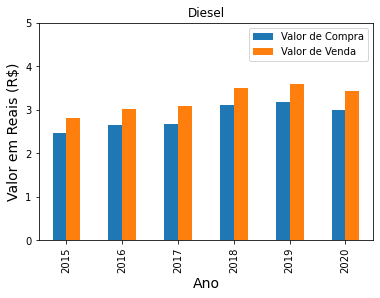

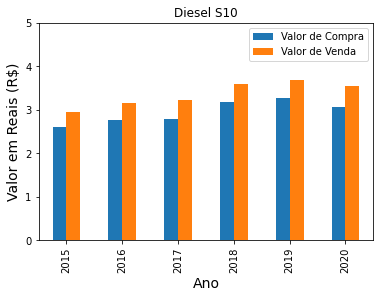

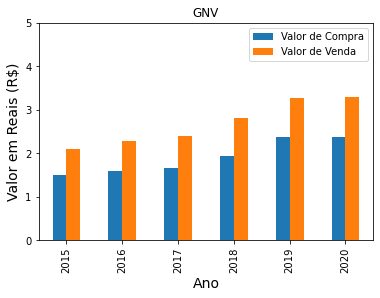

In [25]:
dataframe_gasolina.plot(x='ano', kind='bar', title='Gasolina')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_etanol.plot(x='ano', kind='bar', title='Etanol')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_diesel.plot(x='ano', kind='bar', title='Diesel')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_diesels10.plot(x='ano', kind='bar', title='Diesel S10')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])
dataframe_gnv.plot(x='ano', kind='bar', title='GNV')
plt.ylim(0,5)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Valor em Reais (R$)", fontsize=14)
plt.legend(['Valor de Compra','Valor de Venda'])

    Gráficos comparando o valor de compra e o valor de venda de cada combustível por ano.

In [26]:
df_validos = df_consumo.dropna()
df_validos.count()

id                 2130965
bandeira           2130965
cnpj               2130965
data_da_coleta     2130965
estado_sigla       2130965
municipio          2130965
produto            2130965
razao_social       2130965
regiao_sigla       2130965
valor_de_compra    2130965
valor_de_venda     2130965
ano                2130965
dtype: int64

In [27]:
df_faltantes = df_consumo.loc[df_consumo["valor_de_compra"].isnull()]
df_faltantes.count()

id                 3427571
bandeira           3427571
cnpj               3427571
data_da_coleta     3427571
estado_sigla       3427571
municipio          3427571
produto            3427571
razao_social       3427571
regiao_sigla       3427571
valor_de_compra          0
valor_de_venda     3427571
ano                3427571
dtype: int64

Na nossa base de dados temos em torno de 5 milhões de dados, e identificamos que existem dados inválidos na coluna valor de compra, onde esses dados não estão informados, sendo em torno de 3 milhões de dados. Sugerimos tornar obrigatória a inclusão desse campo na base de dados e com isso permitir que os postos possam utilizar essas informações, que são públicas para tomarem decisões. 


In [28]:
df_faltantes = df_faltantes.groupby('ano')

In [29]:
df_faltantes.count()

,id,bandeira,cnpj,data_da_coleta,estado_sigla,municipio,produto,razao_social,regiao_sigla,valor_de_compra,valor_de_venda
ano,,,,,,,,,,,
2015,676705,676705,676705,676705,676705,676705,676705,676705,676705,0,676705
2016,556068,556068,556068,556068,556068,556068,556068,556068,556068,0,556068
2017,432840,432840,432840,432840,432840,432840,432840,432840,432840,0,432840
2018,576511,576511,576511,576511,576511,576511,576511,576511,576511,0,576511
2019,622159,622159,622159,622159,622159,622159,622159,622159,622159,0,622159
2020,563288,563288,563288,563288,563288,563288,563288,563288,563288,0,563288


A média de dados faltantes é de 571 mil por ano.

In [30]:
df_consumo.groupby(["ano", "produto"]).count()

id  bandeira    cnpj  data_da_coleta  \
ano  produto                                                        
2015 DIESEL              223918    223918  223918          223918   
     DIESEL S10          201793    201793  201793          201793   
     ETANOL              314795    314795  314795          314795   
     GASOLINA            345462    345462  345462          345462   
     GNV                  21779     21779   21779           21779   
2016 DIESEL              189987    189987  189987          189987   
     DIESEL S10          205040    205040  205040          205040   
     ETANOL              269731    269731  269731          269731   
     GASOLINA            295389    295389  295389          295389   
     GNV                  15709     15709   15709           15709   
2017 DIESEL              143472    143472  143472          143472   
     DIESEL S10          180110    180110  180110          180110   
     ETANOL              213853    213853  213853          213853   
     GASOLINA            238999    238999  238999          238999   
     GNV                  12171     12171   12171           12171   
2018 DIESEL              162342    162342  162342          162342   
     DIESEL S10          231937    231937  231937          231937   
     ETANOL              258991    258991  258991          258991   
     GASOLINA            294707    294707  294707          294707   
     GNV                  15024     15024   15024           15024   
2019 DIESEL              162263    162263  162263          162263   
     DIESEL S10          249503    249503  249503          249503   
     ETANOL              271379    271379  271379          271379   
     GASOLINA            305082    305082  305082          305082   
     GNV                  15801     15801   15801           15801   
2020 DIESEL              108750    108750  108750          108750   
     DIESEL S10          177945    177945  177945          177945   
     ETANOL              190504    190504  190504          190504   
     GASOLINA            214042    214042  214042          214042   
     GASOLINA ADITIVADA   15583     15583   15583           15583   
     GNV                  12475     12475   12475           12475   

                         estado_sigla  municipio  razao_social  regiao_sigla  \
ano  produto                                                                   
2015 DIESEL                    223918     223918        223918        223918   
     DIESEL S10                201793     201793        201793        201793   
     ETANOL                    314795     314795        314795        314795   
     GASOLINA                  345462     345462        345462        345462   
     GNV                        21779      21779         21779         21779   
2016 DIESEL                    189987     189987        189987        189987   
     DIESEL S10                205040     205040        205040        205040   
     ETANOL                    269731     269731        269731        269731   
     GASOLINA                  295389     295389        295389        295389   
     GNV                        15709      15709         15709         15709   
2017 DIESEL                    143472     143472        143472        143472   
     DIESEL S10                180110     180110        180110        180110   
     ETANOL                    213853     213853        213853        213853   
     GASOLINA                  238999     238999        238999        238999   
     GNV                        12171      12171         12171         12171   
2018 DIESEL                    162342     162342        162342        162342   
     DIESEL S10                231937     231937        231937        231937   
     ETANOL                    258991     258991        258991        258991   
     GASOLINA                  294707     294707        294707        294707   
     GNV                        15024      15024         15024         

In [31]:
df_consumo.groupby("ano").count()

,id,bandeira,cnpj,data_da_coleta,estado_sigla,municipio,produto,razao_social,regiao_sigla,valor_de_compra,valor_de_venda
ano,,,,,,,,,,,
2015,1107747,1107747,1107747,1107747,1107747,1107747,1107747,1107747,1107747,431042,1107747
2016,975856,975856,975856,975856,975856,975856,975856,975856,975856,419788,975856
2017,788605,788605,788605,788605,788605,788605,788605,788605,788605,355765,788605
2018,963001,963001,963001,963001,963001,963001,963001,963001,963001,386490,963001
2019,1004028,1004028,1004028,1004028,1004028,1004028,1004028,1004028,1004028,381869,1004028
2020,719299,719299,719299,719299,719299,719299,719299,719299,719299,156011,719299


In [32]:
df_2015 = df_consumo.loc[df_consumo['ano'] == 2019]
#df_2015 = df_2015.loc[df_2015['produto'] == "GASOLINA" ]
df_2015 = df_2015.loc[df_2015['bandeira'] == "BRANCA" ]

# print ( df_2015.nunique(axis=0))
df_2015.groupby(["cnpj"]).count()

#5959, 4497, 4381, 5512, 5858, 5401

,id,bandeira,data_da_coleta,estado_sigla,municipio,produto,razao_social,regiao_sigla,valor_de_compra,valor_de_venda,ano
cnpj,,,,,,,,,,,
00.003.188/0002-02,78,78,78,78,78,78,78,78,54,78,78
00.003.188/0004-74,104,104,104,104,104,104,104,104,52,104,104
00.003.188/0005-55,78,78,78,78,78,78,78,78,45,78,78
00.003.188/0019-50,98,98,98,98,98,98,98,98,90,98,98
00.005.892/0001-13,110,110,110,110,110,110,110,110,100,110,110
...,...,...,...,...,...,...,...,...,...,...,...
96.826.375/0001-84,188,188,188,188,188,188,188,188,122,188,188
96.845.417/0001-24,52,52,52,52,52,52,52,52,39,52,52
96.857.388/0001-10,81,81,81,81,81,81,81,81,66,81,81


In [33]:
gasolina_total = df_consumo.loc[df_consumo["produto"] == 'GASOLINA']
gasolina_total = gasolina_total.groupby(["ano"])
gasolina_total = gasolina_total.cnpj.nunique()
print("QUANTIDADE DE POSTOS QUE VENDEM GASOLINA POR ANO")
print(gasolina_total)

QUANTIDADE DE POSTOS QUE VENDEM GASOLINA POR ANO
ano
2015    16789
2016    14444
2017    13359
2018    15731
2019    15536
2020    14537
Name: cnpj, dtype: int64


In [34]:
etanol_total = df_consumo.loc[df_consumo["produto"] == 'ETANOL']
etanol_total = etanol_total.groupby(["ano"])
etanol_total = etanol_total.cnpj.nunique()
print("QUANTIDADE DE POSTOS QUE VENDEM ETANOL POR ANO")
print(etanol_total)

QUANTIDADE DE POSTOS QUE VENDEM ETANOL POR ANO
ano
2015    15677
2016    13445
2017    12279
2018    14232
2019    14245
2020    13347
Name: cnpj, dtype: int64


In [35]:
diesel_total = df_consumo.loc[df_consumo["produto"] == 'DIESEL']
diesel_total = diesel_total.groupby(["ano"])
diesel_total = diesel_total.cnpj.nunique()
print("QUANTIDADE DE POSTOS QUE VENDEM DIESEL POR ANO")
print(diesel_total)

QUANTIDADE DE POSTOS QUE VENDEM DIESEL POR ANO
ano
2015    11322
2016     9040
2017     7822
2018     8768
2019     8222
2020     7438
Name: cnpj, dtype: int64


In [36]:
diesels10_total = df_consumo.loc[df_consumo["produto"] == 'DIESEL S10']
diesels10_total = diesels10_total.groupby(["ano"])
diesels10_total = diesels10_total.cnpj.nunique()
print("QUANTIDADE DE POSTOS QUE VENDEM DIESEL S10 POR ANO")
print(diesels10_total)

QUANTIDADE DE POSTOS QUE VENDEM DIESEL S10 POR ANO
ano
2015    11048
2016    10683
2017    10573
2018    13006
2019    13134
2020    12408
Name: cnpj, dtype: int64


In [37]:
gnv_total = df_consumo.loc[df_consumo["produto"] == 'GNV']
gnv_total = gnv_total.groupby(["ano"])
gnv_total = gnv_total.cnpj.nunique()
print("QUANTIDADE DE POSTOS QUE VENDEM GNV POR ANO")
print(gnv_total)

QUANTIDADE DE POSTOS QUE VENDEM GNV POR ANO
ano
2015    1344
2016    1205
2017    1073
2018    1201
2019    1248
2020    1271
Name: cnpj, dtype: int64


In [38]:
ano = [2015, 2016, 2017, 2018, 2019, 2020]
posto_gasolina = [16789, 14444, 13359, 15731, 15536, 14537]
posto_etanol = [15677,13445, 12279, 14232, 14245, 13347]
posto_diesel = [11322, 9040, 7822, 8768, 8222, 7438]
posto_diesels10 = [11048, 10683, 10573, 13006, 13134, 12408]
posto_gnv = [1344, 1205, 1073, 1201, 1248, 1271]
total_postos = [16920, 14574, 13510, 15837, 15665, 14664]

df_postos = pd.DataFrame({'Ano': ano, 'Gasolina': posto_gasolina,'Etanol': posto_etanol,'Diesel': posto_diesel,'Diesel S10': posto_diesels10,'GNV': posto_gnv, 'Total Postos':total_postos})
df_postos.head(6)

,Ano,Gasolina,Etanol,Diesel,Diesel S10,GNV,Total Postos
0,2015,16789,15677,11322,11048,1344,16920
1,2016,14444,13445,9040,10683,1205,14574
2,2017,13359,12279,7822,10573,1073,13510
3,2018,15731,14232,8768,13006,1201,15837
4,2019,15536,14245,8222,13134,1248,15665
5,2020,14537,13347,7438,12408,1271,14664


In [39]:
percent_gasolina = []
percent_etanol = []
percent_diesel = []
percent_diesels10 = []
percent_gnv = []
for i in range(len(total_postos)):
    percent_gasolina.append( (posto_gasolina[i]/total_postos[i])*100 )
    percent_etanol.append( (posto_etanol[i]/total_postos[i])*100 )
    percent_diesel.append( (posto_diesel[i]/total_postos[i])*100 )
    percent_diesels10.append( (posto_diesels10[i]/total_postos[i])*100 )
    percent_gnv.append( (posto_gnv[i]/total_postos[i])*100 )
    
df_postos = pd.DataFrame({'Ano': ano, 'Gasolina': percent_gasolina,'Etanol': percent_etanol,'Diesel': percent_diesel,'Diesel S10': percent_diesels10,'GNV': percent_gnv})
df_postos.head(6)

,Ano,Gasolina,Etanol,Diesel,Diesel S10,GNV
0,2015,99.225768,92.653664,66.914894,65.295508,7.943262
1,2016,99.108001,92.253328,62.028270,73.301770,8.268149
2,2017,98.882309,90.888231,57.897853,78.260548,7.942265
3,2018,99.330681,89.865505,55.364021,82.124140,7.583507
4,2019,99.176508,90.935206,52.486435,83.842962,7.966805
5,2020,99.133933,91.018822,50.722859,84.615385,8.667485
